### Figure 9 for Siddiqui et al 

#### All the salt budget advection across boundaries figures

In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': '24',
         'axes.titlesize':'24',
         'xtick.labelsize':'24',
         'ytick.labelsize':'24'}
pylab.rcParams.update(params)

from matplotlib.ticker import AutoMinorLocator


In [3]:
pylab.rcParams.update({
  "text.usetex": True
})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [4]:
data_dir = '/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/'

ds_salt_anom_adv_decomp_Iceland_200 = xr.open_dataset(data_dir+'ds_salt_anom_adv_decomp_iceland_200.nc')
ds_salt_bnd_terms_IB_200 = xr.open_dataset(data_dir+'ds_salt_bnd_terms_IB_200.nc')
ds_total = xr.open_dataset(data_dir+'ds_salt_anom_adv_decomp_iceland_200.nc')
ds_total_salt_anom = xr.open_dataset(data_dir+'ds_totalsalt_bnd_terms_IB_200.nc')

In [5]:
ds_total

<xarray.Dataset>
Dimensions:          (time: 310)
Coordinates:
  * time             (time) datetime64[ns] 1992-02-15T12:00:00 ... 2017-11-16
    month            (time) int64 ...
Data variables:
    S_adv            (time) float64 ...
    Uanom_Sclim_eul  (time) float64 ...
    Uclim_Sanom_eul  (time) float64 ...
    Uanom_Sanom_eul  (time) float64 ...
    Uanom_Sclim_bol  (time) float64 ...
    Uclim_Sanom_bol  (time) float64 ...
    Uanom_Sanom_bol  (time) float64 ...
    S_res_num        (time) float64 ...

### Advection decomposition

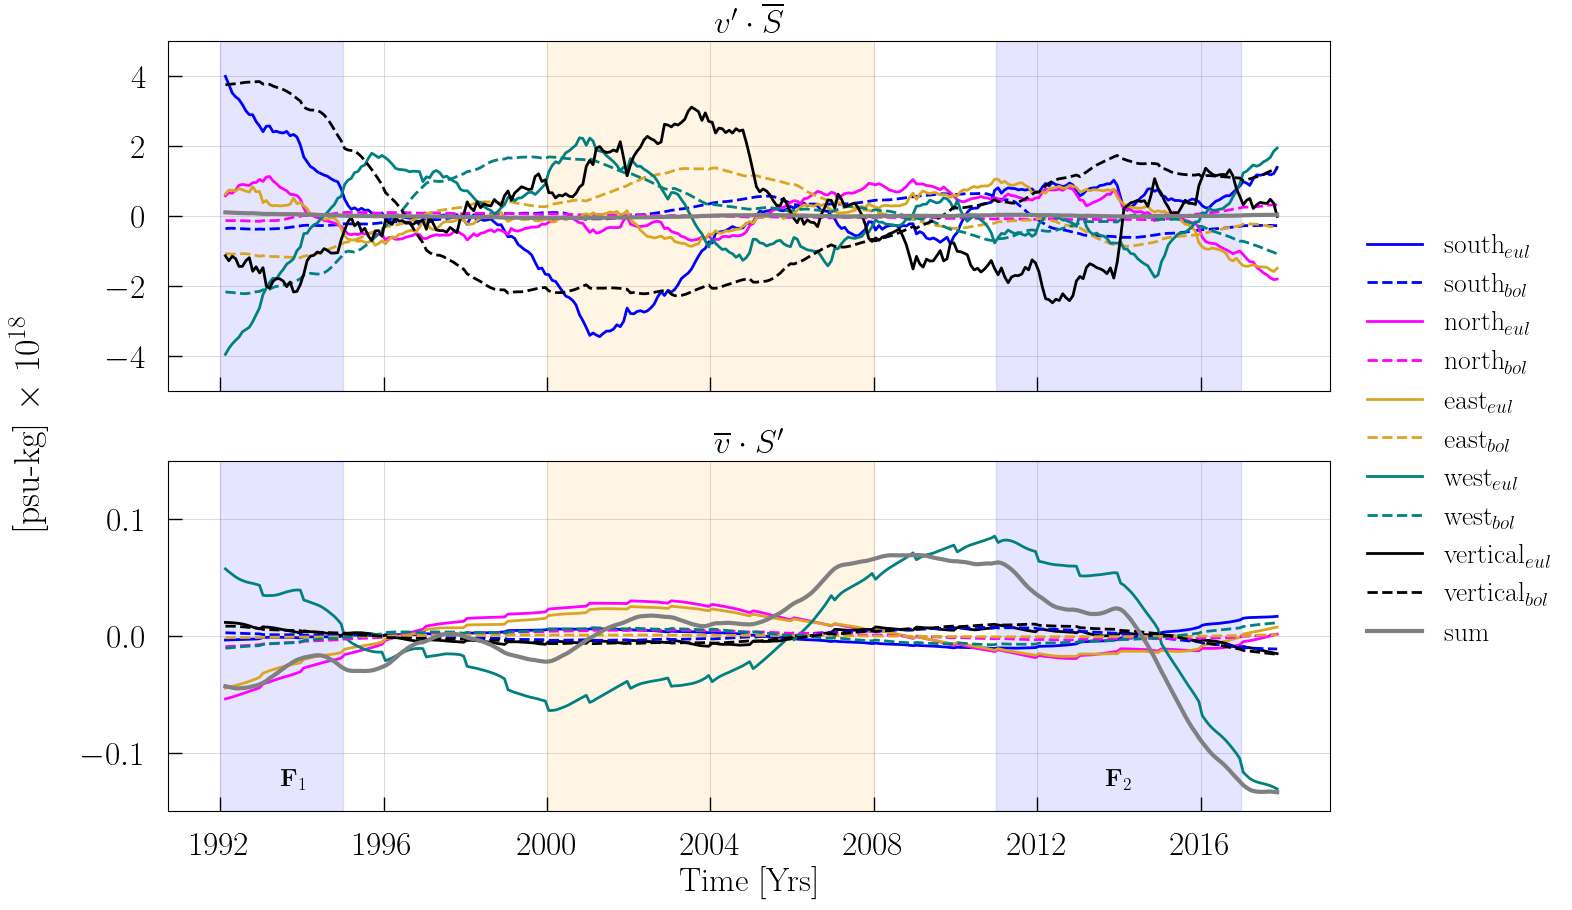

In [6]:

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15,10))

axs = axs.flatten()
fig.supylabel(r'[psu-kg] $\times$ 10$^{18}$', fontsize=26)


axs[0].grid(linestyle='-', linewidth='0.5', color='grey')
axs[0].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Uanom_Sclim_eul.sel(section='south_IB')*1e-12, lw=2, color='blue',
                                                                                    label=r'$\textrm{south}_{eul}$')
axs[0].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Uanom_Sclim_bol.sel(section='south_IB')*1e-12, linestyle='dashed',lw=2, color='blue',
                                                                                        label=r'$\textrm{south}_{bol}$')                                                                                    
axs[0].plot(ds_salt_bnd_terms_IB_200.time, -ds_salt_bnd_terms_IB_200.Uanom_Sclim_eul.sel(section='north_IB')*1e-12, lw=2, color='magenta',
                                                                                    label=r'$\textrm{north}_{eul}$ ')
axs[0].plot(ds_salt_bnd_terms_IB_200.time, -ds_salt_bnd_terms_IB_200.Uanom_Sclim_bol.sel(section='north_IB')*1e-12,linestyle='dashed', lw=2, color='magenta',
                                                                                    label=r'$\textrm{north}_{bol}$')

axs[0].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Uanom_Sclim_eul.sel(section='east_IB')*1e-12, lw=2, color='goldenrod',
                                                                                    label=r'$\textrm{east}_{eul}$ ')
axs[0].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Uanom_Sclim_bol.sel(section='east_IB')*1e-12, linestyle='dashed',lw=2, color='goldenrod',
                                                                                    label=r'$\textrm{east}_{bol}$')

axs[0].plot(ds_salt_bnd_terms_IB_200.time, -ds_salt_bnd_terms_IB_200.Uanom_Sclim_eul.sel(section='west_IB')*1e-12, lw=2, color='teal',
                                                                                    label=r'$\textrm{west}_{eul}$ ')
axs[0].plot(ds_salt_bnd_terms_IB_200.time, -ds_salt_bnd_terms_IB_200.Uanom_Sclim_bol.sel(section='west_IB')*1e-12, linestyle='dashed',lw=2, color='teal',
                                                                                    label=r'$\textrm{west}_{bol}$')

axs[0].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Wanom_Sclim_eul*1e-18, lw=2, color='k',
                                                                                    label=r'$\textrm{vertical}_{eul}$ ')
axs[0].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Wanom_Sclim_bol*1e-18, lw=2, color='k',linestyle='dashed', 
                                                                                    label=r'$\textrm{vertical}_{bol}$')

axs[0].plot(ds_total.time, (ds_total.Uanom_Sclim_bol+ds_total.Uanom_Sclim_eul)*1e-18, lw=3, color='grey', label='sum')



axs[1].grid(linestyle='-', linewidth='0.5', color='grey')

axs[1].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Uclim_Sanom_eul.sel(section='south_IB')*1e-12, lw=2, color='blue',
                                                                                    label=r'$\overline{\mathbf{u}}\cdot\nabla S^{\prime}$ S ')
axs[1].plot(ds_salt_bnd_terms_IB_200.time, -ds_salt_bnd_terms_IB_200.Uclim_Sanom_eul.sel(section='north_IB')*1e-12, lw=2, color='magenta',
                                                                                    label=r'$\overline{\mathbf{u}}\cdot\nabla S^{\prime}$ N ')
axs[1].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Uclim_Sanom_eul.sel(section='east_IB')*1e-12, lw=2, color='goldenrod',
                                                                                    label=r'$\overline{\mathbf{u}}\cdot\nabla S^{\prime}$E ')
axs[1].plot(ds_salt_bnd_terms_IB_200.time, -ds_salt_bnd_terms_IB_200.Uclim_Sanom_eul.sel(section='west_IB')*1e-12, lw=2, color='teal',
                                                                                    label=r'$\overline{\mathbf{u}}\cdot\nabla S^{\prime}$ W ')
axs[1].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Wclim_Sanom_eul*1e-18, lw=2, color='k',
                                                                                    label=r'$\overline{\mathbf{w}}\cdot\nabla S^{\prime}$ V ')



axs[1].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Uclim_Sanom_bol.sel(section='south_IB')*1e-12, linestyle='dashed',lw=2, color='blue',
                                                                                    label=r'$\overline{\mathbf{u}}\cdot\nabla S^{\prime}$ S ')
axs[1].plot(ds_salt_bnd_terms_IB_200.time, -ds_salt_bnd_terms_IB_200.Uclim_Sanom_bol.sel(section='north_IB')*1e-12,linestyle='dashed', lw=2, color='magenta',
                                                                                    label=r'$\overline{\mathbf{u}}\cdot\nabla S^{\prime}$ N ')
axs[1].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Uclim_Sanom_bol.sel(section='east_IB')*1e-12, linestyle='dashed',lw=2, color='goldenrod',
                                                                                    label=r'$\overline{\mathbf{u}}\cdot\nabla S^{\prime}$ E ')
axs[1].plot(ds_salt_bnd_terms_IB_200.time, -ds_salt_bnd_terms_IB_200.Uclim_Sanom_bol.sel(section='west_IB')*1e-12, linestyle='dashed',lw=2, color='teal',
                                                                                    label=r'$\overline{\mathbf{u}}\cdot\nabla S^{\prime}$ W ')
axs[1].plot(ds_salt_bnd_terms_IB_200.time, ds_salt_bnd_terms_IB_200.Wclim_Sanom_bol*1e-18, lw=2, color='k',linestyle='dashed',
                                                                                    label=r'$\overline{\mathbf{u}}\cdot\nabla S^{\prime}$ V ')
axs[1].plot(ds_total.time, (ds_total.Uclim_Sanom_bol+ds_total.Uclim_Sanom_eul)*1e-18, lw=3, color='grey')


axs[0].set_ylim([-5,5])
axs[1].set_ylim([-.15,.15])
axs[0].legend(loc='lower left', ncol=1, bbox_to_anchor=(1.01, -0.8),frameon=False,fontsize=20)


axs[0].grid(True, alpha=0.4)
axs[0].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)

axs[1].set_xlabel('Time [Yrs]')
#plt.ylim(-0.2,0.2)
axs[1].grid(True, alpha=0.4)
axs[1].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)



# axs[0].set_title(r'${\mathcal A}^\prime$')# $\mathbf{u} \cdot S - \overline{(\mathbf{u} \cdot S)}$
axs[0].set_title(r'${v}^{\prime} \cdot \overline{S}$')
axs[1].set_title(r'$\overline{{v}}\cdot S^{\prime}$')

plt.figtext(0.2,0.135, r'\textbf{F$_1$}', fontsize=18)
plt.figtext(0.75,0.135, r'\textbf{F$_2$}', fontsize=18)

axs[0].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
axs[0].axvspan(xmin='2011-01',xmax='2017-01',color='blue',alpha=0.1)
axs[0].axvspan(xmin='2000-01',xmax='2008-01',color='orange',alpha=0.1)
axs[1].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2000-01',xmax='2008-01',color='orange',alpha=0.1)
axs[1].axvspan(xmin='2011-01',xmax='2017-01',color='blue',alpha=0.1)

plt.savefig('figs/Fig_9.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=400)

